# Using Quantifiers

This notebook focuses on the general usage of quantifiers rather than specific details of each quantifier, which can be found in the [documentation](https://sigment.readthedocs.io/en/latest/sections/quantifiers.html).

To best understand this notebook, it is recommended that you read the [Using Transformations](https://nbviewer.jupyter.org/github/eonu/sigment/blob/master/notebooks/Using%20Transformations.ipynb) notebook first.

---

**Contents**:

- [What are quantifiers?](#What-are-quantifiers?)
- [Nested quantifiers](#Nested-quantifiers)
- [Probabilistic quantification](#Probabilistic-quantification)
- [Applying in random order](#Applying-in-random-order)

In [1]:
import matplotlib.pyplot as plt
from librosa import load
from sigment import *
from utils import plot
plt.style.use('ggplot')

In [2]:
# Load some sample audio
X, sr = load('assets/audio.wav', mono=False)

## What are quantifiers?

Quantifiers (along with transformations) are one of the two core components of Sigment. They allow you to collectively apply multiple transformations to an audio signal, according to how the quantifier specifies the transformations should be applied.

The most basic quantifier is the `Pipeline`, which simply applies all of the specified transformations in the pipeline in order:

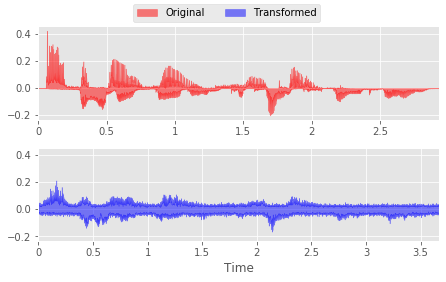

In [3]:
# Create an augmentation pipeline
aug = Pipeline([
    TimeStretch(rate=0.8),
    GaussianWhiteNoise(scale=(0.01, 0.015))
])

# Augment and plot the audio signal
plot(X, aug(X), sr=sr)

As mentioned in the [Using Transformations](https://nbviewer.jupyter.org/github/eonu/sigment/blob/master/notebooks/Using%20Transformations.ipynb) notebook, it is sometimes useful to use the `p` parameter in transformations, to introduce an element of randomness to a quantifier:

```python
aug = Pipeline([
    TimeStretch(rate=0.8, p=0.4),
    GaussianWhiteNoise(scale=(0.01, 0.015), p=0.85)
])
```

To control the randomness, rather than specifying the `random_state` argument for each transformation, you can specify a global random state as a parameter of the quantifier. Doing this will internally set the same random state object for each transformation:

```python
aug = Pipeline([
    TimeStretch(rate=0.8, p=0.4),
    GaussianWhiteNoise(scale=(0.01, 0.015), p=0.85)
], random_state=0)
```

## Nested quantifiers

Sigment supports the creation of more complex data augmentation pipelines by allowing quantifiers to be nested within each other.

Suppose we wish to take the previous pipeline consisting of `TimeStretch` and `GaussianWhiteNoise` transformations, and add either a fade in or fade out transformation afterwards. We can nest the pipeline with a `OneOf` quantifier to do this:

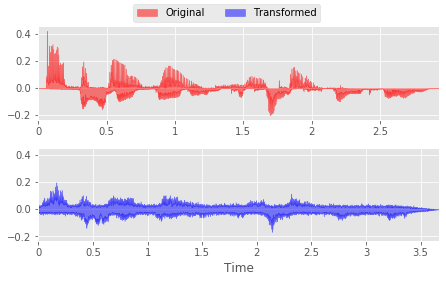

In [4]:
# Create an augmentation pipeline
aug = Pipeline([
    TimeStretch(rate=0.8),
    GaussianWhiteNoise(scale=(0.01, 0.015)),
    OneOf([
        LinearFade('in', fade_size=(0.1, 0.2)),
        LinearFade('out', fade_size=(0.1, 0.2))
    ])
])

# Augment and plot the audio signal
plot(X, aug(X), sr=sr)

Once again, although all quantifiers and transforms accept a `random_state` argument, it is only necessary to include it in the outermost quantifier:

```python
aug = Pipeline([
    TimeStretch(rate=0.8),
    GaussianWhiteNoise(scale=(0.01, 0.015)),
    OneOf([
        LinearFade('in', fade_size=(0.1, 0.2)),
        LinearFade('out', fade_size=(0.1, 0.2))
    ])
], random_state=0)
```

## Probabilistic quantification

Unlike transformations, not all quantifiers (and therefore the transformations that fall under them) can be applied probabilistically by specifying a `p` argument.

Only the `Sometimes` quantifier can be used to achieve this:

```python
aug = Pipeline([
    TimeStretch(rate=0.8),
    GaussianWhiteNoise(scale=(0.01, 0.015)),
    Sometimes([
        OneOf([
            LinearFade('in', fade_size=(0.1, 0.2)),
            LinearFade('out', fade_size=(0.1, 0.2))
        ])
    ], p=0.65)
], random_state=0)
```

## Applying in random order

In some cases, it might be desirable to randomize the order in which transformations defined under a quantifier are applied. Setting the `random_order` parameter (defined on all quantifiers) to `True` can be used to achieve this:

```python
aug = Pipeline([
    TimeStretch(rate=0.8, p=0.4),
    GaussianWhiteNoise(scale=(0.01, 0.015), p=0.85)
], random_state=0, random_order=True)
```

The `random_state` parameter can also be used to control the randomness of the `random_order` parameter.